In [1]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
positions=pd.read_csv('positions.csv')

In [4]:
positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stock_id            3000 non-null   int64  
 1   name                3000 non-null   object 
 2   ticker              3000 non-null   object 
 3   country             3000 non-null   object 
 4   currency            2998 non-null   object 
 5   sector              3000 non-null   object 
 6   industry            3000 non-null   object 
 7   sub_industry        3000 non-null   object 
 8   beta                3000 non-null   float64
 9   avg_daily_volume    3000 non-null   int64  
 10  side                3000 non-null   object 
 11  posn_shares         3000 non-null   int64  
 12  cost_basis_local    3000 non-null   float64
 13  market_price_local  3000 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 328.3+ KB


In [5]:
positions.head()

,stock_id,name,ticker,country,currency,sector,industry,sub_industry,beta,avg_daily_volume,side,posn_shares,cost_basis_local,market_price_local
0,1,equity_1,AGI,DEU,EUR,Information Technology,Software & Services,Systems Software,1.735624,10043,SHORT,-4810,145.19,147.06
1,2,equity_2,PWH,RUS,USD,Consumer Staples,Food Beverage & Tobacco,Meat Poultry & Fish,0.675354,640830,LONG,38342,112.48,100.28
2,3,equity_3,NDE,DEU,USD,Industrials,Capital Goods,Heavy Electrical Equipment,0.699394,36094,SHORT,-19881,43.36,41.56
3,4,equity_4,ABB,USA,USD,Financials,Insurance,Reinsurance,2.215079,135786553,SHORT,-100194,24.79,26.38
4,5,equity_5,WRF,RUS,USD,Utilities,Utilities,Electric Utilities,1.259133,26094,LONG,3963,149.90,149.53


In [6]:
positions_stats = positions.describe()
positions_stats

,stock_id,beta,avg_daily_volume,posn_shares,cost_basis_local,market_price_local
count,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,1500.500000,1.247901,3.493957e+07,-703.228667,658.214177,659.471010
std,866.169729,0.689492,2.342771e+08,54228.415888,2488.112915,2493.669087
min,1.000000,0.110735,0.000000e+00,-826100.000000,4.490000,4.530000
25%,750.750000,0.750708,1.135525e+04,-6643.000000,61.017500,61.797500
50%,1500.500000,1.065386,1.225905e+05,-151.500000,121.950000,121.910000
75%,2250.250000,1.547872,3.320204e+06,6520.000000,187.217500,187.265000
max,3000.000000,7.205475,7.626954e+09,574215.000000,21483.390000,20153.040000


In [7]:
positions_unique = {
    'country': positions['country'].unique(),
    'name': positions['name'].unique(),
    'ticker': positions['ticker'].unique(),
    'currency': positions['currency'].unique(),
    'sector': positions['sector'].unique(),
    'side': positions['side'].unique()
}
positions_unique

{'country': array(['DEU', 'RUS', 'USA', 'JPN', 'FIN', 'GRC', 'AUS', 'BEL', 'CHE',
        'NLD', 'ESP', 'HKG', 'FRA', 'ITA', 'BRA', 'CAN', 'GBR', 'CHN'],
       dtype=object),
 'name': array(['equity_1', 'equity_2', 'equity_3', ..., 'equity_2998',
        'equity_2999', 'equity_3000'], dtype=object),
 'ticker': array(['AGI', 'PWH', 'NDE', ..., 'YOV', 'YFG', 'TEG'], dtype=object),
 'currency': array(['EUR', 'USD', 'CAD', 'JPY', 'AUD', 'CHF', 'CNY', 'BRL', 'GBP',
        'HKD', nan], dtype=object),
 'sector': array(['Information Technology', 'Consumer Staples', 'Industrials',
        'Financials', 'Utilities', 'Consumer Discretionary', 'Materials',
        'Health Care', 'Energy', 'Telecommunication Services'],
       dtype=object),
 'side': array(['SHORT', 'LONG'], dtype=object)}

In [8]:
print(positions[positions['currency'].isnull()])

      stock_id         name ticker country currency                  sector  \
2296      2297  equity_2297    MOM     AUS      NaN             Industrials   
2305      2306  equity_2306    ONW     ITA      NaN  Consumer Discretionary   

            industry            sub_industry      beta  avg_daily_volume  \
2296  Transportation                  Marine  0.589532          36086448   
2305           Media  Movies & Entertainment  1.310975             81798   

       side  posn_shares  cost_basis_local  market_price_local  
2296   LONG         3864            135.73              137.41  
2305  SHORT        -3242            158.89              168.70  


In [9]:
positions.loc[positions['country'] == 'AUS', 'currency'] = 'AUD'
positions.loc[positions['country'] == 'ITA', 'currency'] = 'EUR'

In [10]:
fx=pd.read_csv('fx.csv')

In [11]:
fx_dic= fx.set_index('currency')['to_USD'].to_dict()

In [12]:
fx_dic

{'AUD': 0.774394813,
 'BRL': 0.304710039,
 'CAD': 0.747211271,
 'CHF': 1.046150143,
 'CNY': 0.158036983,
 'EUR': 1.107643001,
 'GBP': 1.344329327,
 'HKD': 0.13036114,
 'JPY': 0.009876463}

In [13]:
positions['to_USD'] = positions['currency'].map(fx_dic)

In [14]:
positions.loc[positions['currency'] == 'USD', 'to_USD'] = 1.0

In [15]:
positions['cost_basis_usd'] = positions['cost_basis_local'] * positions['to_USD']
positions['market_price_usd'] = positions['market_price_local'] * positions['to_USD']

### Portfolio Overview

In [16]:
positions['market_value_usd'] = positions['market_price_usd'] * positions['posn_shares']

In [17]:
gross_exposure = positions['market_value_usd'].abs().sum()
gross_exposure

np.float64(3309227079.6389265)

In [18]:
net_exposure = positions.loc[positions['side'] == 'LONG', 'market_value_usd'].sum() + \
               positions.loc[positions['side'] == 'SHORT', 'market_value_usd'].sum()

net_exposure

np.float64(-69776056.18142414)

In [19]:
long_exposure = positions.loc[positions['side'] == 'LONG', 'market_value_usd'].sum()
short_exposure = positions.loc[positions['side'] == 'SHORT', 'market_value_usd'].sum()
long_exposure, short_exposure

(np.float64(1619725511.7287512), np.float64(-1689501567.9101753))

In [20]:
ls_ratio=long_exposure/short_exposure
ls_ratio
## slightly short bias

np.float64(-0.9587002122361251)

In [21]:
largest_position = positions.loc[positions['market_value_usd'].abs().idxmax()]
largest_position #ZXT

,2969
stock_id,2970
name,equity_2970
ticker,ZXT
country,JPN
currency,JPY
sector,Health Care
industry,Pharmaceuticals & Biotechnology
sub_industry,Biotechnology
beta,0.808189
avg_daily_volume,3849021


In [22]:
riskiest_position = positions.loc[(positions['beta'] * positions['market_value_usd']).abs().idxmax()]
riskiest_position ##highest beta in contribution to pf

,2929
stock_id,2930
name,equity_2930
ticker,DFB
country,BRA
currency,BRL
sector,Health Care
industry,Pharmaceuticals & Biotechnology
sub_industry,Pharmaceuticals
beta,3.108001
avg_daily_volume,56968


In [23]:
countries = positions['country'].nunique()
countries


18

In [24]:
position_count = positions['stock_id'].nunique()
position_count

3000

In [25]:
positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stock_id            3000 non-null   int64  
 1   name                3000 non-null   object 
 2   ticker              3000 non-null   object 
 3   country             3000 non-null   object 
 4   currency            3000 non-null   object 
 5   sector              3000 non-null   object 
 6   industry            3000 non-null   object 
 7   sub_industry        3000 non-null   object 
 8   beta                3000 non-null   float64
 9   avg_daily_volume    3000 non-null   int64  
 10  side                3000 non-null   object 
 11  posn_shares         3000 non-null   int64  
 12  cost_basis_local    3000 non-null   float64
 13  market_price_local  3000 non-null   float64
 14  to_USD              3000 non-null   float64
 15  cost_basis_usd      3000 non-null   float64
 16  market

## Beta Analysis

In [26]:
beta_weighted_exposure = (positions['beta'] * positions['market_value_usd']).sum() ## beta exposure weighted by market value


In [27]:
positions['beta_contribution'] = positions['beta'] * positions['market_value_usd']
largest_beta_contributors = positions.loc[positions['beta_contribution'].abs().nlargest(10).index]

In [28]:
sector_beta_exposure = positions.groupby('sector')['beta_contribution'].sum()

In [29]:
largest_beta_contributors

,stock_id,name,ticker,country,currency,sector,industry,sub_industry,beta,avg_daily_volume,side,posn_shares,cost_basis_local,market_price_local,to_USD,cost_basis_usd,market_price_usd,market_value_usd,beta_contribution
2929,2930,equity_2930,DFB,BRA,BRL,Health Care,Pharmaceuticals & Biotechnology,Pharmaceuticals,3.108001,56968,LONG,111590,358.78,381.37,0.304710,109.323868,116.207268,1.296757e+07,4.030321e+07
2451,2452,equity_2452,LCO,CHE,CHF,Health Care,Pharmaceuticals & Biotechnology,Life Sciences Tools & Services,4.068492,138539,SHORT,-148785,40.91,41.83,1.046150,42.798002,43.760460,-6.510900e+06,-2.648954e+07
2755,2756,equity_2756,VSU,BEL,EUR,Health Care,Pharmaceuticals & Biotechnology,Life Sciences Tools & Services,1.892090,1878600640,SHORT,-199985,56.74,61.09,1.107643,62.847664,67.665911,-1.353217e+07,-2.560408e+07
2817,2818,equity_2818,RHS,USA,CAD,Consumer Staples,Household & Personal Products,Household Products,3.280343,264262,SHORT,-99096,90.56,84.70,0.747211,67.667453,63.288795,-6.271666e+06,-2.057322e+07
657,658,equity_658,PJZ,GBR,GBP,Health Care,Pharmaceuticals & Biotechnology,Biotechnology,1.443002,135396,LONG,93312,107.69,110.69,1.344329,144.770825,148.803813,1.388518e+07,2.003634e+07
1402,1403,equity_1403,HEW,USA,CAD,Financials,Banks,Regional Banks,3.519518,4294021,SHORT,-37666,213.08,200.47,0.747211,159.215778,149.793443,-5.642120e+06,-1.985754e+07
2609,2610,equity_2610,AOG,USA,USD,Health Care,Pharmaceuticals & Biotechnology,Biotechnology,1.574179,1583674483,SHORT,-166051,73.83,70.14,1.000000,73.830000,70.140000,-1.164682e+07,-1.833418e+07
249,250,equity_250,GET,FIN,EUR,Consumer Staples,Household & Personal Products,Household Products,1.881098,156476,LONG,87980,99.80,96.62,1.107643,110.542771,107.020467,9.415661e+06,1.771178e+07
1446,1447,equity_1447,ECZ,GRC,EUR,Consumer Staples,Household & Personal Products,Household Products,1.661976,7805208,LONG,323290,29.95,28.84,1.107643,33.173908,31.944424,1.032731e+07,1.716374e+07
2951,2952,equity_2952,NYY,BRA,BRL,Information Technology,Semiconductors & Semiconductor Equipment,Semiconductors,2.578156,16210,SHORT,-40102,533.03,542.84,0.304710,162.419592,165.408798,-6.633224e+06,-1.710148e+07


In [30]:
positions.head()

,stock_id,name,ticker,country,currency,sector,industry,sub_industry,beta,avg_daily_volume,side,posn_shares,cost_basis_local,market_price_local,to_USD,cost_basis_usd,market_price_usd,market_value_usd,beta_contribution
0,1,equity_1,AGI,DEU,EUR,Information Technology,Software & Services,Systems Software,1.735624,10043,SHORT,-4810,145.19,147.06,1.107643,160.818687,162.88998,-7.835008e+05,-1.359863e+06
1,2,equity_2,PWH,RUS,USD,Consumer Staples,Food Beverage & Tobacco,Meat Poultry & Fish,0.675354,640830,LONG,38342,112.48,100.28,1.000000,112.480000,100.28000,3.844936e+06,2.596694e+06
2,3,equity_3,NDE,DEU,USD,Industrials,Capital Goods,Heavy Electrical Equipment,0.699394,36094,SHORT,-19881,43.36,41.56,1.000000,43.360000,41.56000,-8.262544e+05,-5.778774e+05
3,4,equity_4,ABB,USA,USD,Financials,Insurance,Reinsurance,2.215079,135786553,SHORT,-100194,24.79,26.38,1.000000,24.790000,26.38000,-2.643118e+06,-5.854714e+06
4,5,equity_5,WRF,RUS,USD,Utilities,Utilities,Electric Utilities,1.259133,26094,LONG,3963,149.90,149.53,1.000000,149.900000,149.53000,5.925874e+05,7.461462e+05


In [31]:
print(positions['beta_contribution'])

0      -1.359863e+06
1       2.596694e+06
2      -5.778774e+05
3      -5.854714e+06
4       7.461462e+05
            ...     
2995   -7.456289e+04
2996    8.538590e+05
2997    7.114669e+05
2998    1.471756e+06
2999    6.594148e+05
Name: beta_contribution, Length: 3000, dtype: float64


In [32]:
sector_beta_exposure

,beta_contribution
sector,
Consumer Discretionary,-3.278213e+07
Consumer Staples,4.504792e+06
Energy,-4.051551e+07
Financials,3.855647e+06
Health Care,-7.778658e+07
Industrials,2.614158e+07
Information Technology,1.026576e+07
Materials,-6.679518e+05
Telecommunication Services,6.196972e+05


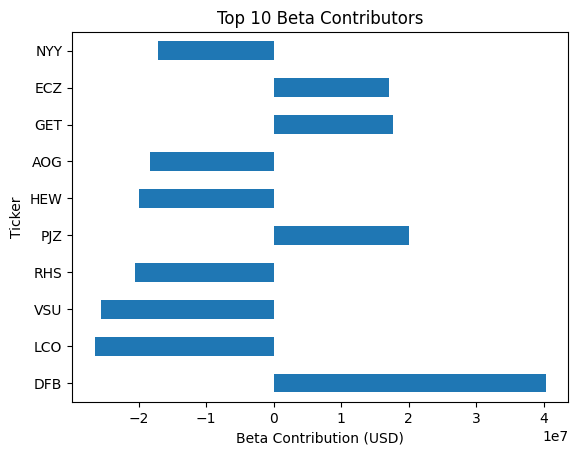

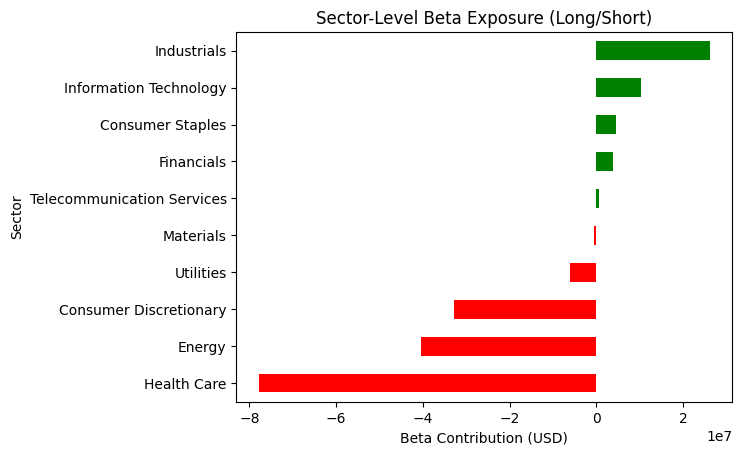

In [33]:
# Largest Beta Contributors
largest_beta_contributors.plot(
    kind='barh',
    x='ticker',
    y='beta_contribution',
    title='Top 10 Beta Contributors',
    legend=False
)
plt.xlabel('Beta Contribution (USD)')
plt.ylabel('Ticker')
plt.show()

# Sector-Level Beta Exposure


sector_beta_exposure_sorted = sector_beta_exposure.sort_values()
sector_beta_exposure_sorted.plot(kind='barh', color=sector_beta_exposure_sorted.apply(lambda x: 'green' if x > 0 else 'red'))
plt.title('Sector-Level Beta Exposure (Long/Short)')
plt.xlabel('Beta Contribution (USD)')
plt.ylabel('Sector')
plt.show()



## Geographic/ Sector Exposure

In [34]:
geographic_exposure = positions.groupby('country')['market_value_usd'].sum()

sector_exposure = positions.groupby('sector')['market_value_usd'].sum()

In [35]:
geographic_exposure

,market_value_usd
country,
AUS,4.512387e+06
BEL,-1.811789e+07
BRA,-2.341979e+07
CAN,1.285177e+06
CHE,2.993498e+06
CHN,-1.127599e+07
DEU,1.791463e+07
ESP,7.767531e+06
FIN,3.967509e+07


In [36]:
sector_exposure

,market_value_usd
sector,
Consumer Discretionary,-1.820910e+07
Consumer Staples,6.499566e+06
Energy,-2.093590e+07
Financials,-1.802249e+06
Health Care,-5.464654e+07
Industrials,1.044464e+07
Information Technology,1.325645e+07
Materials,-4.399033e+06
Telecommunication Services,6.502653e+06


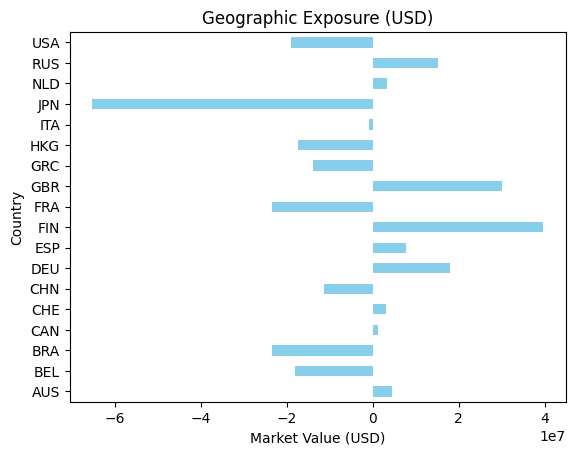

In [37]:
geographic_exposure.plot(kind='barh', title='Geographic Exposure (USD)', color='skyblue')
plt.xlabel('Market Value (USD)')
plt.ylabel('Country')
plt.show()

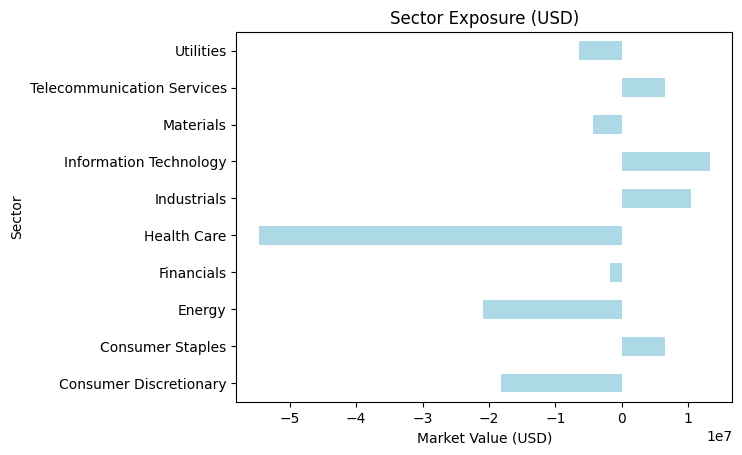

In [38]:
sector_exposure.plot(kind='barh', title='Sector Exposure (USD)', color='lightblue')
plt.xlabel('Market Value (USD)')
plt.ylabel('Sector')
plt.show()


In [39]:
sector_exposure

,market_value_usd
sector,
Consumer Discretionary,-1.820910e+07
Consumer Staples,6.499566e+06
Energy,-2.093590e+07
Financials,-1.802249e+06
Health Care,-5.464654e+07
Industrials,1.044464e+07
Information Technology,1.325645e+07
Materials,-4.399033e+06
Telecommunication Services,6.502653e+06


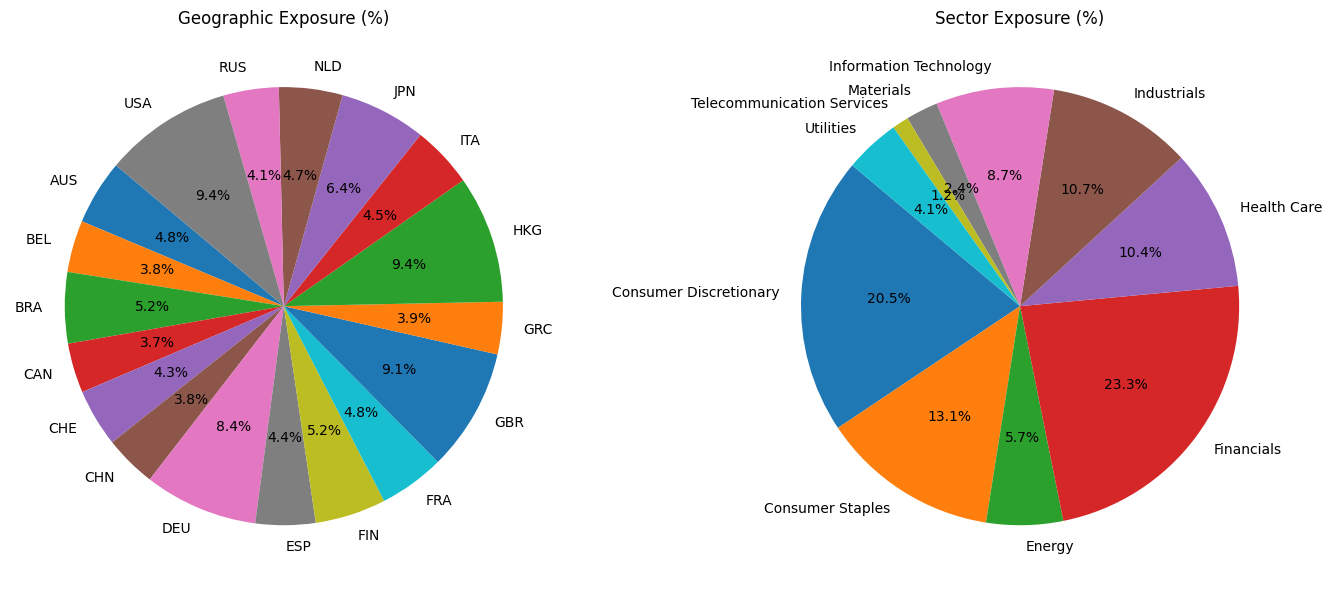

In [40]:
total_abs_portfolio_value = positions['market_value_usd'].abs().sum()

geographic_exposure = positions.groupby('country')['market_value_usd'].apply(lambda x: x.abs().sum())
geographic_exposure_pct = (geographic_exposure / total_abs_portfolio_value) * 100

sector_exposure = positions.groupby('sector')['market_value_usd'].apply(lambda x: x.abs().sum())
sector_exposure_pct = (sector_exposure / total_abs_portfolio_value) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(geographic_exposure_pct, labels=geographic_exposure_pct.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Geographic Exposure (%)')

axes[1].pie(sector_exposure_pct, labels=sector_exposure_pct.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Sector Exposure (%)')

plt.tight_layout()
plt.show()



## Liquidity Check




In [41]:
trade_volume_pct_ADV = positions.apply(lambda row: np.abs(row['posn_shares']) / row['avg_daily_volume'] if row['avg_daily_volume']!=0 else np.nan, axis=1)
trade_volume_pct_ADV

,0
0,0.478941
1,0.059832
2,0.550812
3,0.000738
4,0.151874
...,...
2995,0.072659
2996,0.000267
2997,1.914578
2998,0.004240


## Largest Positions

In [42]:
# Top 10 Positions by  Market Value
top_10_positions = positions.loc[positions['market_value_usd'].abs().nlargest(10).index, ['ticker', 'sector', 'beta', 'market_value_usd']]

# Top 10 Largest Risk Contributors
top_10_risk_contributors = positions.loc[positions['beta_contribution'].abs().nlargest(10).index, ['ticker', 'sector', 'beta', 'market_value_usd', 'beta_contribution']]


In [43]:
top_10_risk_contributors

,ticker,sector,beta,market_value_usd,beta_contribution
2929,DFB,Health Care,3.108001,1.296757e+07,4.030321e+07
2451,LCO,Health Care,4.068492,-6.510900e+06,-2.648954e+07
2755,VSU,Health Care,1.892090,-1.353217e+07,-2.560408e+07
2817,RHS,Consumer Staples,3.280343,-6.271666e+06,-2.057322e+07
657,PJZ,Health Care,1.443002,1.388518e+07,2.003634e+07
1402,HEW,Financials,3.519518,-5.642120e+06,-1.985754e+07
2609,AOG,Health Care,1.574179,-1.164682e+07,-1.833418e+07
249,GET,Consumer Staples,1.881098,9.415661e+06,1.771178e+07
1446,ECZ,Consumer Staples,1.661976,1.032731e+07,1.716374e+07
2951,NYY,Information Technology,2.578156,-6.633224e+06,-1.710148e+07


In [44]:
top_10_positions

,ticker,sector,beta,market_value_usd
2969,ZXT,Health Care,0.808189,-1.964231e+07
2708,ZYD,Health Care,0.522965,-1.862032e+07
1974,GVP,Consumer Staples,0.554347,1.525115e+07
1185,TNX,Consumer Staples,0.878405,1.414554e+07
657,PJZ,Health Care,1.443002,1.388518e+07
2755,VSU,Health Care,1.892090,-1.353217e+07
2929,DFB,Health Care,3.108001,1.296757e+07
1219,YWC,Consumer Staples,0.742857,-1.196331e+07
1630,PRU,Health Care,0.835935,1.184844e+07
2609,AOG,Health Care,1.574179,-1.164682e+07


## Neutrality

In [45]:
# Beta Neutrality
beta_weighted_exposure=positions['beta_contribution'].sum()
portfolio_weighted_beta = beta_weighted_exposure / gross_exposure

# Dollar Neutrality
dollar_neutrality = net_exposure / gross_exposure
dollar_neutrality

np.float64(-0.02108530315454734)

### Alerts and Anomalies

In [46]:
beta_threshold = 2.0
geographic_exposure_threshold = 9     # 9% of total absolute portfolio value
sector_exposure_threshold = 20        # 20% of total absolute portfolio value
single_stock_concentration_threshold = 0.1  # 10% of total absolute portfolio value


beta_contribution = positions['beta'] * positions['market_value_usd']
high_beta_positions = positions.loc[beta_contribution.abs() > beta_threshold,
                                    ['ticker', 'sector', 'beta', 'market_value_usd']].copy()
high_beta_positions['beta_contribution'] = beta_contribution.loc[high_beta_positions.index]


high_geographic_exposures = {country: exposure for country, exposure in geographic_exposure_pct.items() if exposure > geographic_exposure_threshold}

high_sector_exposures = {sector: exposure for sector, exposure in sector_exposure_pct.items() if exposure > sector_exposure_threshold}


market_value_pct = positions['market_value_usd'].abs() / total_abs_portfolio_value
single_stock_concentration = positions.loc[market_value_pct > single_stock_concentration_threshold,
                                           ['ticker', 'sector', 'market_value_usd']].copy()
single_stock_concentration['market_value_pct'] = market_value_pct.loc[single_stock_concentration.index]




positions1 = positions.loc[trade_volume_pct_ADV > 0.2, ['ticker', 'sector', 'market_value_usd', 'posn_shares', 'avg_daily_volume']].copy()
positions1['trade_volume_pct_ADV'] = trade_volume_pct_ADV.loc[positions1.index]

positions2 = positions.loc[trade_volume_pct_ADV > 10, ['ticker', 'sector', 'market_value_usd', 'avg_daily_volume', 'market_price_usd']].copy()
positions2['trade_volume_pct_ADV'] = trade_volume_pct_ADV.loc[positions2.index]

# 5. Collecting All Alerts into a Dictionary
alerts = {
    "High Beta Positions": high_beta_positions,
    "High Geographic Exposures": high_geographic_exposures,
    "High Sector Exposures": high_sector_exposures,
    "Single Stock Concentration": single_stock_concentration,
    "Moderate Liquidity Risk Positions": positions1,
    "High Liquidity Risk Positions": positions2,
}

alerts


{'High Beta Positions':      ticker                  sector      beta  market_value_usd  \
 0       AGI  Information Technology  1.735624     -7.835008e+05   
 1       PWH        Consumer Staples  0.675354      3.844936e+06   
 2       NDE             Industrials  0.699394     -8.262544e+05   
 3       ABB              Financials  2.215079     -2.643118e+06   
 4       WRF               Utilities  1.259133      5.925874e+05   
 ...     ...                     ...       ...               ...   
 2995    HSH  Information Technology  1.723244     -4.326891e+04   
 2996    QLG               Utilities  0.977303      8.736895e+05   
 2997    YOV               Utilities  1.186587      5.995912e+05   
 2998    YFG  Consumer Discretionary  0.799109      1.841747e+06   
 2999    TEG             Industrials  1.879576      3.508318e+05   
 
       beta_contribution  
 0         -1.359863e+06  
 1          2.596694e+06  
 2         -5.778774e+05  
 3         -5.854714e+06  
 4          7.461462e+05

In [47]:
# 1. Top 10 Beta Contributors (Horizontal Bar Chart)
fig_beta_top10 = px.bar(
    largest_beta_contributors,
    x='beta_contribution',
    y='ticker',
    orientation='h',
    title='Top 10 Beta Contributors',
    labels={'beta_contribution': 'Beta Contribution (USD)', 'ticker': 'Ticker'}
)

# 2. Sector-Level Beta Exposure
sector_beta_exposure_sorted = sector_beta_exposure.sort_values()
colors = ['green' if x > 0 else 'red' for x in sector_beta_exposure_sorted]
fig_sector_beta = go.Figure(go.Bar(
    x=sector_beta_exposure_sorted.values,
    y=sector_beta_exposure_sorted.index,
    orientation='h',
    marker_color=colors
))
fig_sector_beta.update_layout(
    title='Sector-Level Beta Exposure',
    xaxis_title='Beta Contribution (USD)',
    yaxis_title='Sector'
)

# 3. Geographic Exposure
fig_geo_exposure = px.bar(
    x=geographic_exposure.values,
    y=geographic_exposure.index,
    orientation='h',
    title='Geographic Exposure (USD)',
    labels={'x': 'Market Value (USD)', 'y': 'Country'},
    color_discrete_sequence=['skyblue']
)

# 4. Sector Exposure
fig_sector_exposure = px.bar(
    x=sector_exposure.values,
    y=sector_exposure.index,
    orientation='h',
    title='Sector Exposure (USD)',
    labels={'x': 'Market Value (USD)', 'y': 'Sector'},
    color_discrete_sequence=['lightblue']
)

# 5. Geographic Exposure (%) Pie Chart
fig_geo_pct = px.pie(
    names=geographic_exposure_pct.index,
    values=geographic_exposure_pct.values,
    title='Geographic Exposure (%)'
)

# 6. Sector Exposure (%) Pie Chart
fig_sector_pct = px.pie(
    names=sector_exposure_pct.index,
    values=sector_exposure_pct.values,
    title='Sector Exposure (%)'
)

#### Dashboard

In [51]:
pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.5 MB/s eta 0:00:00


In [52]:
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html, Input, Output, dash_table

In [53]:
external_stylesheets = [dbc.themes.BOOTSTRAP]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "Portfolio Dashboard"

In [54]:
sidebar_horizontal = dbc.Card(
    dbc.CardBody(
        dbc.Row(
            [
                dbc.Col([
                    html.Label("Sector"),
                    dcc.Dropdown(
                        id="sector-filter",
                        options=[{"label": s, "value": s} for s in sorted(positions_unique["sector"])],
                        multi=True,
                        placeholder="Select sector",
                        style={"width": "150px"}
                    )
                ], width="auto"),
                dbc.Col([
                    html.Label("Country"),
                    dcc.Dropdown(
                        id="country-filter",
                        options=[{"label": c, "value": c} for c in sorted(positions_unique["country"])],
                        multi=True,
                        placeholder="Select country",
                        style={"width": "150px"}
                    )
                ], width="auto"),
                dbc.Col([
                    html.Label("Ticker"),
                    dcc.Dropdown(
                        id="ticker-filter",
                        options=[{"label": t, "value": t} for t in sorted(positions_unique["ticker"])],
                        multi=True,
                        placeholder="Select ticker",
                        style={"width": "150px"}
                    )
                ], width="auto"),
                dbc.Col([
                    html.Label("Side"),
                    dcc.RadioItems(
                        id="side-filter",
                        options=[{"label": s, "value": s} for s in sorted(positions_unique["side"])],
                        value=None,
                        labelStyle={"display": "inline-block", "margin-right": "10px"}
                    )
                ], width="auto"),
            ],
            align="center",
            justify="between"
        )
    ),
    style={"margin": "10px"}
)

In [55]:
content = dbc.Container(
    [
        dbc.Card(id="portfolio-overview", className="mb-4"),
        dbc.Card(id="exposures", className="mb-4"),
        sidebar_horizontal,
        dbc.Card(id="alerts", className="mb-4"),
    ],
    fluid=True,
)

In [56]:
app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col(content, width=12)
            ]
        )
    ],
    fluid=True,
)

In [57]:
def filter_data(sector, country, ticker, side):
    """Filter positions based on the selected filters."""
    df = positions.copy()
    if sector:
        df = df[df["sector"].isin(sector)]
    if country:
        df = df[df["country"].isin(country)]
    if ticker:
        df = df[df["ticker"].isin(ticker)]
    if side:
        df = df[df["side"] == side]
    return df

In [58]:
@app.callback(
    Output("portfolio-overview", "children"),
    [Input("sector-filter", "value"),
     Input("country-filter", "value"),
     Input("ticker-filter", "value"),
     Input("side-filter", "value")]
)
def update_portfolio_overview(selected_sector, selected_country, selected_ticker, selected_side):
    df = filter_data(selected_sector, selected_country, selected_ticker, selected_side)
    if df.empty:
        return html.Div("No data available for Portfolio Overview.")

    #Overview
    gross_exposure = df["market_value_usd"].abs().sum()
    net_exposure = (df.loc[df["side"] == "LONG", "market_value_usd"].sum() +
                    df.loc[df["side"] == "SHORT", "market_value_usd"].sum())
    long_exposure = df.loc[df["side"] == "LONG", "market_value_usd"].sum()
    short_exposure = df.loc[df["side"] == "SHORT", "market_value_usd"].sum()
    ls_ratio = long_exposure / abs(short_exposure) if short_exposure != 0 else np.nan

    #Neutrality
    dollar_neutrality = net_exposure / gross_exposure if gross_exposure else np.nan
    beta_weighted_exposure = df["beta_contribution"].sum()
    portfolio_weighted_beta = beta_weighted_exposure / gross_exposure if gross_exposure else np.nan
    long_beta = df.loc[df["side"] == "LONG", "beta_contribution"].sum()
    short_beta = df.loc[df["side"] == "SHORT", "beta_contribution"].sum()

    #Largest Positions
    largest_position = df.iloc[df["market_value_usd"].abs().idxmax()]
    riskiest_position = df.iloc[(df["beta"] * df["market_value_usd"]).abs().idxmax()]

    #Top 10 Largest Positions Table
    top_positions = df.iloc[df["market_value_usd"].abs().nlargest(10).index][
        ["ticker", "sector", "market_value_usd"]
    ]


    top_beta = df.iloc[df["beta_contribution"].abs().nlargest(10).index]
    fig_top_beta = px.bar(
        top_beta,
        x="beta_contribution",
        y="ticker",
        orientation="h",
        labels={'beta_contribution': 'Beta Contribution (USD)', 'ticker': 'Ticker'},
        color="side",
        color_discrete_map={"LONG": "green", "SHORT": "red"},
        title="Top 10 Beta Contributors"
    )
    sector_beta = df.groupby("sector")["beta_contribution"].sum().reset_index()
    sector_beta = sector_beta.sort_values("beta_contribution")
    sector_beta["color"] = sector_beta["beta_contribution"].apply(lambda x: "green" if x > 0 else "red")
    fig_sector_beta = px.bar(
        sector_beta,
        x="beta_contribution",
        y="sector",
        orientation="h",
        color="color",
        labels={"beta_contribution": "Beta Contribution (USD)", "sector": "Sector"},
        color_discrete_map={"green": "green", "red": "red"},
        title="Sector-Level Beta Exposure (Long/Short)"
    )

    overview_elements = [
        html.H3("Portfolio Overview"),
        html.P(f"Gross Exposure: ${gross_exposure:,.2f}"),
        html.P(f"Net Exposure: ${net_exposure:,.2f}"),
        html.P(f"Long Exposure: ${long_exposure:,.2f}"),
        html.P(f"Short Exposure: ${short_exposure:,.2f}"),
        html.P(f"Long/Short Ratio: {ls_ratio:.2f}"),
        html.P(f"Dollar Neutrality (Net/Gross): {dollar_neutrality:.2f}"),
        html.P(f"Portfolio Weighted Beta: {portfolio_weighted_beta:.2f}"),
        html.P(f"Long Beta Exposure: ${long_beta:,.2f}"),
        html.P(f"Short Beta Exposure: ${short_beta:,.2f}"),
        html.P(f"Largest Position: {largest_position['ticker']} (${largest_position['market_value_usd']:,.2f})"),
        html.P(f"Riskiest Position: {riskiest_position['ticker']} (Beta: {riskiest_position['beta']:.2f})"),
        html.Br(),
        html.H4("Top 10 Largest Positions"),
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in top_positions.columns],
            data=top_positions.to_dict("records"),
            style_cell={"textAlign": "left"},
            style_header={"fontWeight": "bold"},
            page_size=10,
        ),
        html.Br(),
        html.Div([
            dcc.Graph(figure=fig_top_beta),
            dcc.Graph(figure=fig_sector_beta)
        ])
    ]
    return dbc.CardBody(overview_elements)

#Geographic / Sector Exposure

@app.callback(
    Output("exposures", "children"),
    [Input("sector-filter", "value"),
     Input("country-filter", "value"),
     Input("ticker-filter", "value"),
     Input("side-filter", "value")]
)
def update_exposures(selected_sector, selected_country, selected_ticker, selected_side):
    df = filter_data(selected_sector, selected_country, selected_ticker, selected_side)
    if df.empty:
        return html.Div("No exposure data available.")

    total_abs = df["market_value_usd"].abs().sum()
    geo_exposure = df.groupby('country')['market_value_usd'].apply(lambda x: x.abs().sum())
    geo_exposure_pct = (geo_exposure / total_abs) * 100

    sec_exposure = df.groupby('sector')['market_value_usd'].apply(lambda x: x.abs().sum())
    sec_exposure_pct = (sec_exposure / total_abs) * 100

    fig_geo = px.pie(
        names=geo_exposure_pct.index,
        values=geo_exposure_pct.values,
        title="Geographic Exposure (%)"
    )
    fig_sector = px.pie(
        names=sec_exposure_pct.index,
        values=sec_exposure_pct.values,
        title="Sector Exposure (%)"
    )

    exposures_layout = dbc.Row(
        [
            dbc.Col(dcc.Graph(figure=fig_geo), width=6),
            dbc.Col(dcc.Graph(figure=fig_sector), width=6),
        ]
    )
    return dbc.CardBody([html.H3("Geographic / Sector Exposure"), exposures_layout])

#Alerts & Anomalies

@app.callback(
    Output("alerts", "children"),
    [Input("sector-filter", "value"),
     Input("country-filter", "value"),
     Input("ticker-filter", "value"),
     Input("side-filter", "value")]
)
def update_alerts(selected_sector, selected_country, selected_ticker, selected_side):
    df = filter_data(selected_sector, selected_country, selected_ticker, selected_side)
    if df.empty:
        return html.Div("No alerts available.")

    beta_contrib = df['beta'] * df['market_value_usd']
    high_beta_positions = df.loc[beta_contrib.abs() > beta_threshold,
                                 ['ticker', 'sector', 'beta', 'market_value_usd']].copy()
    if not high_beta_positions.empty:
        high_beta_positions["beta_contribution"] = beta_contrib.loc[high_beta_positions.index]

    total_abs = df["market_value_usd"].abs().sum()
    geo_exposure_pct = (df.groupby("country")["market_value_usd"]
                        .apply(lambda x: x.abs().sum()) / total_abs * 100).to_dict()
    high_geo = {country: pct for country, pct in geo_exposure_pct.items() if pct > geographic_exposure_threshold}

    sec_exposure_pct = (df.groupby("sector")["market_value_usd"]
                        .apply(lambda x: x.abs().sum()) / total_abs * 100).to_dict()
    high_sector = {sector: pct for sector, pct in sec_exposure_pct.items() if pct > sector_exposure_threshold}

    market_value_pct = df["market_value_usd"].abs() / total_abs
    single_stock_concentration = df.loc[market_value_pct > single_stock_concentration_threshold,
                                        ['ticker', 'sector', 'market_value_usd']].copy()
    if not single_stock_concentration.empty:
        single_stock_concentration["market_value_pct"] = market_value_pct.loc[single_stock_concentration.index]

    tv_pct= df.apply(lambda row: np.abs(row['posn_shares']) / row['avg_daily_volume'] if row['avg_daily_volume']!=0 else np.nan, axis=1)
    positions1 = df.loc[tv_pct > 0.2,
                        ['ticker', 'sector', 'market_value_usd', 'posn_shares', 'avg_daily_volume']].copy()
    if not positions1.empty:
        positions1["trade_volume_pct_ADV"] = tv_pct.loc[positions1.index]

    positions2 = df.loc[tv_pct > 10,
                        ['ticker', 'sector', 'market_value_usd', 'avg_daily_volume', 'market_price_usd']].copy()
    if not positions2.empty:
        positions2["trade_volume_pct_ADV"] = tv_pct.loc[positions2.index]

    alerts_layout = [
        html.H3("Alerts & Anomalies"),
        html.H4("High Beta Positions"),
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in high_beta_positions.columns],
            data=high_beta_positions.to_dict("records") if not high_beta_positions.empty else [],
            style_data_conditional=[
                {"if": {"column_id": "beta_contribution", "filter_query": '{beta_contribution} > 0'}, "color": "green"},
                {"if": {"column_id": "beta_contribution", "filter_query": '{beta_contribution} < 0'}, "color": "red"},
            ],
            page_size=10,
        ),
        html.Br(),
        html.H4(f"High Geographic Exposures (> {geographic_exposure_threshold}%)"),
        html.Pre(str(high_geo)),
        html.Br(),
        html.H4(f"High Sector Exposures (> {sector_exposure_threshold}%)"),
        html.Pre(str(high_sector)),
        html.Br(),
        html.H4(f"Single Stock Concentration (> {single_stock_concentration_threshold*100}%)"),
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in single_stock_concentration.columns],
            data=single_stock_concentration.to_dict("records") if not single_stock_concentration.empty else [],
            style_data_conditional=[
                {"if": {"column_id": "market_value_pct", "filter_query": '{market_value_pct} >= 0.1'}, "color": "red"},
            ],
            page_size=10,
        ),
        html.Br(),
        html.H4("Liquidity Risk Positions (>20% of ADV)"),
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in positions1.columns],
            data=positions1.to_dict("records") if not positions1.empty else [],
            page_size=10,
        ),
        html.Br(),
        html.H4("High Liquidity Risk Positions (>1000% of ADV)"),
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in positions2.columns],
            data=positions2.to_dict("records") if not positions2.empty else [],
            page_size=10,
        ),
    ]
    return dbc.CardBody(alerts_layout)

In [61]:
if __name__ == "__main__":
    app.run(debug=True)

<IPython.core.display.Javascript object>